# Predict Winner After Toss

This notebook includes toss decision and toss winner for predicting match outcome.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('gold_df.csv')
# Drop rows with missing winner info
df = df.dropna(subset=['winner'])

### Feature Selection

In [2]:
features = ['team1', 'team2', 'venue', 'city', 'season', 'toss_winner', 'toss_decision']
target = 'winner'
df_model = df[features + [target]].dropna()

# Label Encoding
label_encoders = {}
for col in features + [target]:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le

X = df_model[features]
y = df_model[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Train Random Forest Model

In [3]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.9972097428611655

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      8791
           1       1.00      0.99      1.00     10014
           2       1.00      1.00      1.00      8187
           3       1.00      1.00      1.00      2924
           4       1.00      1.00      1.00      8437
           5       1.00      1.00      1.00       376
           6       1.00      1.00      1.00      9271
           7       1.00      1.00      1.00      1842
           8       0.99      1.00      1.00     10347
           9       1.00      1.00      1.00      1893
          10       0.99      1.00      1.00      8033
          11       1.00      0.99      1.00      8014

    accuracy                           1.00     78129
   macro avg       1.00      1.00      1.00     78129
weighted avg       1.00      1.00      1.00     78129



### Feature Importance Visualization

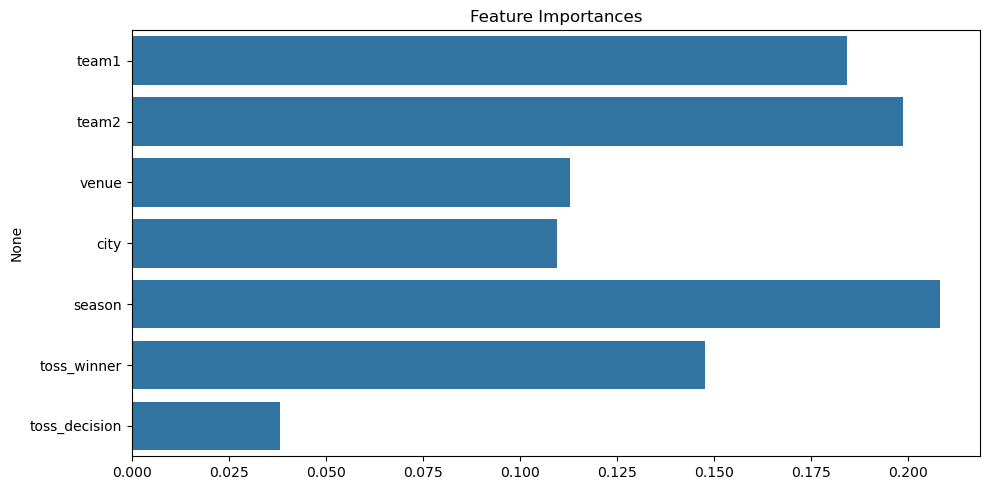

In [4]:
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns)
plt.figure(figsize=(10, 5))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title('Feature Importances')
plt.tight_layout()
plt.show()